In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
inventory_df = pd.read_excel("Inventory_Dataset.xlsx")
new_inventory_df = pd.read_excel("New_Inventory.xlsx")

In [92]:
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'], format='%d/%m/%Y')
new_inventory_df['Inventory Receive'] = pd.to_datetime(new_inventory_df['Inventory Receive'], format='%d/%m/%Y')

In [95]:
merged_df = pd.merge(inventory_df, new_inventory_df, on='Item Number', how='outer')

In [97]:
merged_df

,Item Number,Date,Inventory,Inventory Receive,Total Item Qty
0,064-01-1347,2023-06-17,3561.0,2023-07-10,2000.0
1,064-01-1347,2023-06-17,3561.0,2023-07-07,1000.0
2,064-01-1347,2023-06-17,3561.0,2023-07-09,3568.0
3,064-01-1347,2023-06-17,3561.0,2023-08-04,1800.0
4,064-01-1361,2023-06-17,4035.0,2023-07-10,2000.0
...,...,...,...,...,...
1224,064-18-4752,NaT,NaN,2023-11-26,12424.0
1225,064-18-3496,NaT,NaN,2023-08-16,20812.0
1226,064-18-3496,NaT,NaN,2023-09-15,9940.0
1227,064-18-4295,NaT,NaN,2023-08-16,14820.0


In [103]:
future_dates = pd.date_range(start='6/17/2023', end='12/26/2023', freq='W')
table_data = pd.DataFrame(index=merged_df['Item Number'].unique(), columns=future_dates)

In [108]:
table_data

,2023-06-18,2023-06-25,2023-07-02,2023-07-09,2023-07-16,2023-07-23,2023-07-30,2023-08-06,2023-08-13,2023-08-20,...,2023-10-22,2023-10-29,2023-11-05,2023-11-12,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24
064-01-1347,14244.0,14244.0,14244.0,18812.0,20812.0,20812.0,20812.0,22612.0,22612.0,22612.0,...,22612.0,22612.0,22612.0,22612.0,22612.0,22612.0,22612.0,22612.0,22612.0,22612.0
064-01-1361,16140.0,16140.0,16140.0,21384.0,23384.0,23384.0,23384.0,25584.0,25584.0,25584.0,...,25584.0,25584.0,25584.0,25584.0,25584.0,25584.0,25584.0,25584.0,25584.0,25584.0
064-01-1375,8052.0,8052.0,8052.0,11400.0,11400.0,11400.0,11400.0,11400.0,11400.0,14800.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
064-01-1385,20544.0,20544.0,20544.0,24436.0,26436.0,26436.0,26436.0,28636.0,28636.0,28636.0,...,28636.0,28636.0,28636.0,28636.0,28636.0,28636.0,28636.0,28636.0,28636.0,28636.0
064-01-1399,25596.0,25596.0,25596.0,32232.0,34632.0,34632.0,34632.0,36632.0,36632.0,36632.0,...,36632.0,36632.0,36632.0,36632.0,36632.0,36632.0,36632.0,36632.0,36632.0,36632.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18700.0,18700.0,23800.0,23800.0
064-18-0309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12424.0,12424.0,20500.0,20500.0,20500.0
064-18-4752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12424.0,12424.0,20500.0,20500.0,20500.0
064-18-3496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20812.0,...,30752.0,30752.0,30752.0,30752.0,30752.0,30752.0,30752.0,30752.0,30752.0,30752.0


In [112]:
monthly_inventory = table_data.resample('M', axis=1).sum()

C:\Users\tataj\AppData\Local\Temp\ipykernel_21584\3896734922.py:1: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_inventory = table_data.resample('M', axis=1).sum()


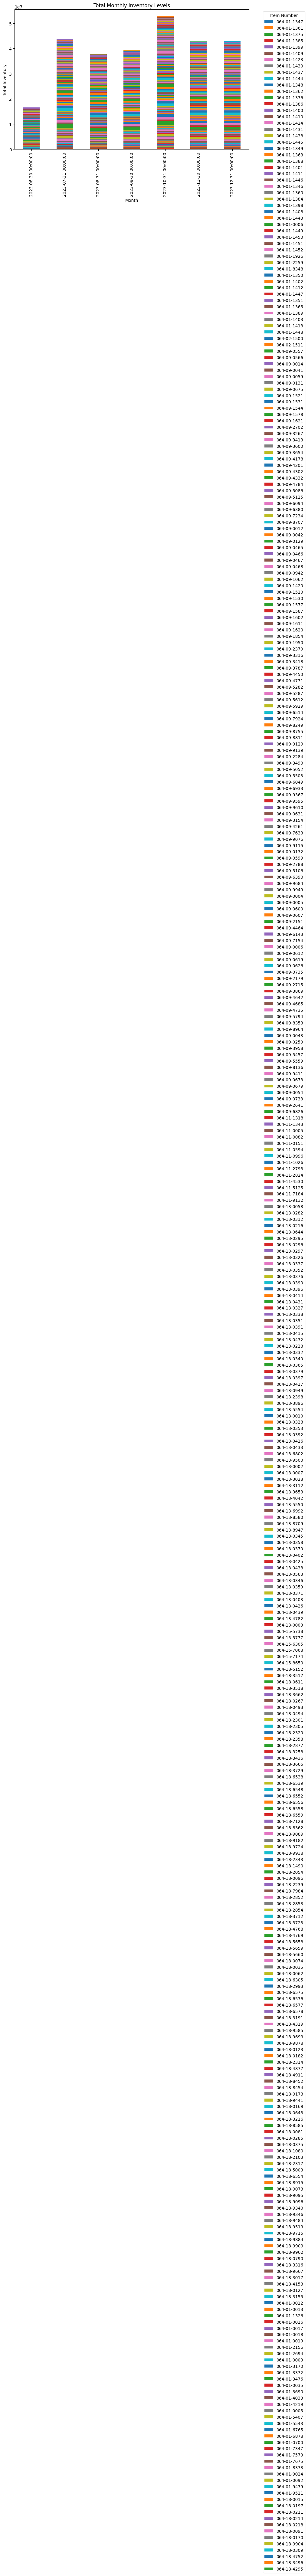

In [113]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
monthly_inventory.T.plot(kind='bar', stacked=True, ax=ax)
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.legend(title='Item Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()